## chapter 2 
### 本章目的
#### 哪些是有用的文本语料和词汇资源，怎么使用Python获得？ 
#### 哪些Python结构对于这项工作最有用？
#### 我们写Python代码时怎么避免重复
### 本章内容
#### 获取文本语料库
#### 条件频率分布
#### 更多关于Python：代码重用
#### 词典资源
#### WordNet

In [2]:
%matplotlib inline

In [3]:
import nltk 
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [5]:
# sents 函数用来按句子切割文本
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [6]:
# 获得最长句式
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

raw函数能在没有进行过任何语言学处理之前把文本的内容分析出来，能够告诉我们文本中有多少词汇（包括空格）
，words得到有多少单词，sents得到有多少句子

In [7]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


### 网络和聊天文本
NLTK的网络文本小集合内容包括Firefox交流论坛，
《加勒比海盗》的电影剧本，个人广告和葡萄酒的评论等

In [8]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [9]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
len(chatroom)
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

### 布朗语料库

布朗语料库是第一个百万词级的英语电子语料库，由布朗大学于1961 年创建

In [10]:
from nltk.corpus import brown
brown.categories()
#得到语料库的板块分类

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [11]:
# 得到news目录下的单词
brown.words(categories = 'news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [12]:
print(brown.fileids())

['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44', 'cb01', 'cb02', 'cb03', 'cb04', 'cb05', 'cb06', 'cb07', 'cb08', 'cb09', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15', 'cb16', 'cb17', 'cb18', 'cb19', 'cb20', 'cb21', 'cb22', 'cb23', 'cb24', 'cb25', 'cb26', 'cb27', 'cc01', 'cc02', 'cc03', 'cc04', 'cc05', 'cc06', 'cc07', 'cc08', 'cc09', 'cc10', 'cc11', 'cc12', 'cc13', 'cc14', 'cc15', 'cc16', 'cc17', 'cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17', 'ce01', 'ce02', 'ce03', 'ce04', 'ce05', 'ce06', 'ce07', 'ce08', 'ce09', 'ce10', 'ce11', 'ce12', 'ce13', 'ce14', 'ce15', 'ce16', 'ce17', 'ce18', 'ce19', 'ce20',

In [13]:
# 得到指定文本编号的文本里的单词
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [14]:
brown.sents(categories=['news','editional','reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [15]:
# 统计某些词的词频
from nltk.corpus import brown
news_text = brown.words(categories = 'news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m+':', fdist[m], end='\n')

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


### 路透社语料库

路透社语料库包含10788个新闻文档，共计130万字。这些文档分成90个主题，按照“训练”和“测试”分为两组

In [16]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [17]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [18]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [19]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

### 美国总统就职演说语料库

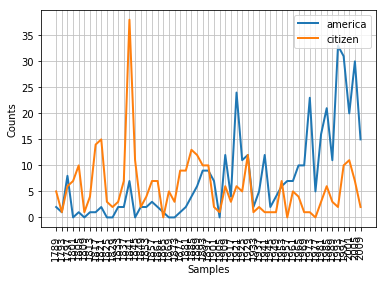

In [20]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                                for fileid in inaugural.fileids()
                                for w in inaugural.words(fileid)
                                for target in ['america', 'citizen']
                                if w.lower().startswith(target))
cfd.plot()

### 标注文本语料库
很多语料库都含有语言学标记，比如词性标注、命名实体、句法结构、语义角色等等。详见课本49页。

### 其他语言的语料库

In [21]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [22]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [23]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [24]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [25]:
nltk.corpus.udhr.words('Chinese_Mandarin-GB2312')[11:]

['日', '，', '联', '合', '国', '大', '会', '通', '过', '并', '颁', ...]

In [26]:
nltk.corpus.udhr.words('Japanese_Nihongo-UTF8')[11:]

['〈', '前文', '〉', ...]

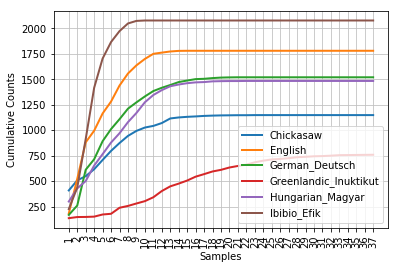

In [27]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

### 文本语料库的结构

##### Text Corpus Structure

In [29]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'